# 🚢 Titanic - Machine Learning from Disaster
Welcome to the Titanic survival prediction project! In this notebook, we'll build a machine learning pipeline to predict which passengers survived the Titanic shipwreck.

---

## 1. Introduction
- In this classic Kaggle competition, the goal is to predict survival on the Titanic based on features like age, sex, passenger class, and more.

---

## 2. Project Workflow Outline
- Load data
- EDA
- Data cleaning
- Feature engineering / Data Transformation
- Modeling
- Evaluation
- Prediction & submission

---

## 3. Import Libraries
```python
# import pandas as pd, numpy, matplotlib, seaborn, sklearn, etc.

In [83]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns 
import matplotlib.pyplot as plt

## 4. Load Data
Load datasets into separate dataframes

In [84]:
train_data = pd.read_csv('../datasets/train.csv')
print("Train data: ")
train_data.head()

Train data: 


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [85]:
test_data = pd.read_csv('../datasets/test.csv')
print("Test data: ")
test_data.head()

Test data: 


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [86]:
gender_submission = pd.read_csv('../datasets/gender_submission.csv')
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## Data Preparation step 
To make preprocessing easier for both training and test datasets


In [87]:


# Add a flag to indicate training set (1 = training data)
train_data['train_test'] = 1

# Add a flag to indicate test set (0 = test data)
test_data['train_test'] = 0

# Add a placeholder 'Survived' column to test set so it matches training set structure
# We set it to NaN because we don't know the survival outcome for the test data
test_data['Survived'] = np.nan

# Combine both datasets into one so we can apply cleaning and feature engineering uniformly
all_data = pd.concat([train_data, test_data])

# Ensure plots are displayed directly below the code cells (useful for Jupyter/Kaggle notebooks)
%matplotlib inline

# Display column names in the combined dataset
all_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'train_test'],
      dtype='object')

## 5. Exploratory Data Analysis (EDA) - aka Data Understanding

Check data shape, types, missing values, basic stats

Visualizations (distribution, correlation)

Class imbalance

Patterns/anomalies

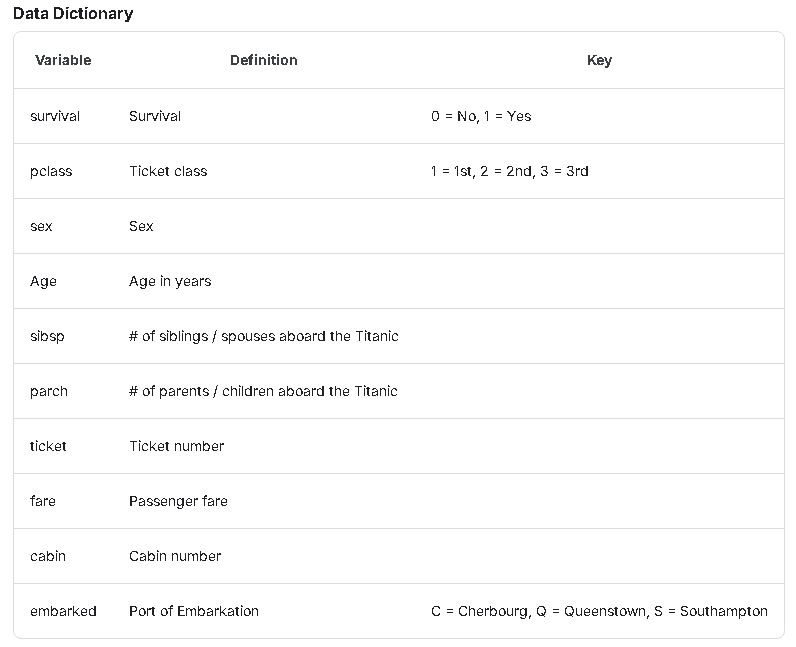
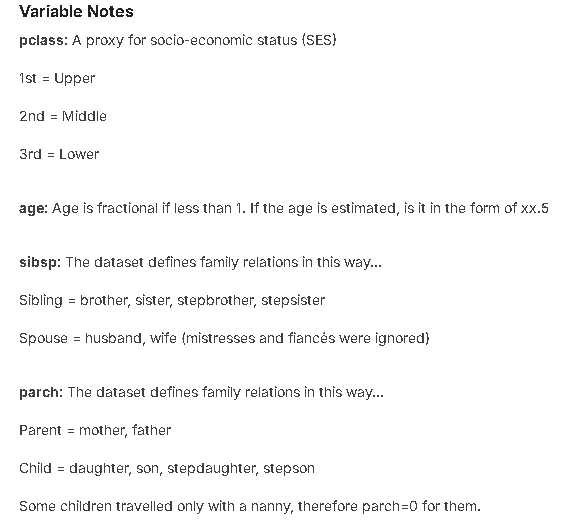

In [88]:
# Display the first few rows of the training data
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [89]:
# We will use info() to get a summary of the dataset, including the number of non-null values and data types for each column
# Display the info of the training data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [90]:
# We will use the describe() method to get a quick overview of the numeric variables in the dataset
# This includes count, mean, standard deviation, min, max, and quartiles for each numeric column
# Display summary statistics for the training data
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [91]:
# Display the numeric columns in the training data
train_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

### Light Data Exploration¶
1) For numeric data
- Made histograms to understand distributions
- Corrplot
- Pivot table comparing survival rate across numeric variables
2) For Categorical Data
- Made bar charts to understand balance of classes
- Made pivot tables to understand relationship with survival

In [92]:
# Split the training data into numeric and categorical columns for EDA

# Numeric columns
df_num = train_data[['Age','SibSp','Parch','Fare']]

# Categorical columns
df_cat = train_data[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

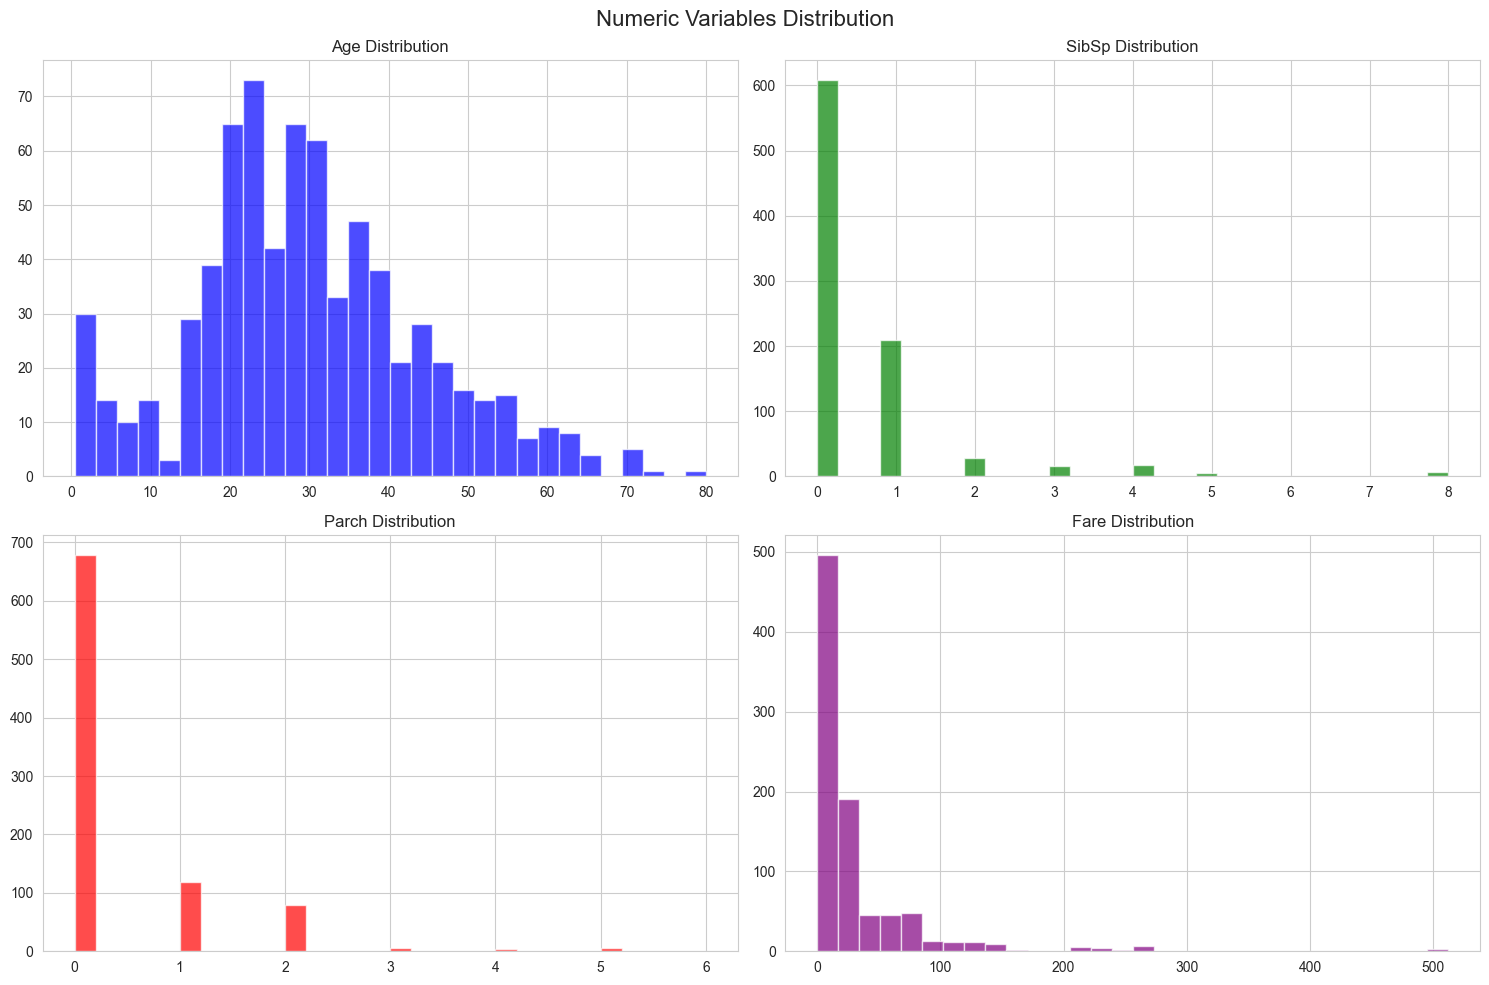

In [93]:
# We will explore numeric variables first - look at which variables require scaling or transformation
# We will use histograms to visualize the distributions of numeric variables
# This will help us understand the distributions and relationships between the numeric variables

# Set the figure size for the histograms
plt.figure(figsize=(15, 10)) #Standard size for 2x2 grid of subplots

# Create a 2x2 grid of subplots
# Plot the distribution of each numeric variable in a separate subplot
# Each subplot will have a histogram of the variable's values
# The first subplot will show the distribution of 'Age', the second will show 'SibSp', the third will show 'Parch', and the fourth will show 'Fare'
# The histograms will have 30 bins, and we will use different colors for each variable
# We will also add titles to each subplot for clarity

plt.subplot(2, 2, 1)
plt.hist(df_num['Age'], bins=30, color='blue', alpha=0.7, label='Age')
plt.title('Age Distribution')
plt.subplot(2, 2, 2)
plt.hist(df_num['SibSp'], bins=30, color='green', alpha=0.7, label='SibSp')
plt.title('SibSp Distribution')
plt.subplot(2, 2, 3)
plt.hist(df_num['Parch'], bins=30, color='red', alpha=0.7, label='Parch')
plt.title('Parch Distribution')
plt.subplot(2, 2, 4)
plt.hist(df_num['Fare'], bins=30, color='purple', alpha=0.7, label='Fare')

plt.title('Fare Distribution')
# Add a common title for the entire figure
plt.suptitle('Numeric Variables Distribution', fontsize=16)
plt.tight_layout() # Adjust the layout to prevent overlap of subplots
plt.show() # not necessary in Jupyter notebooks, but good practice to include

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


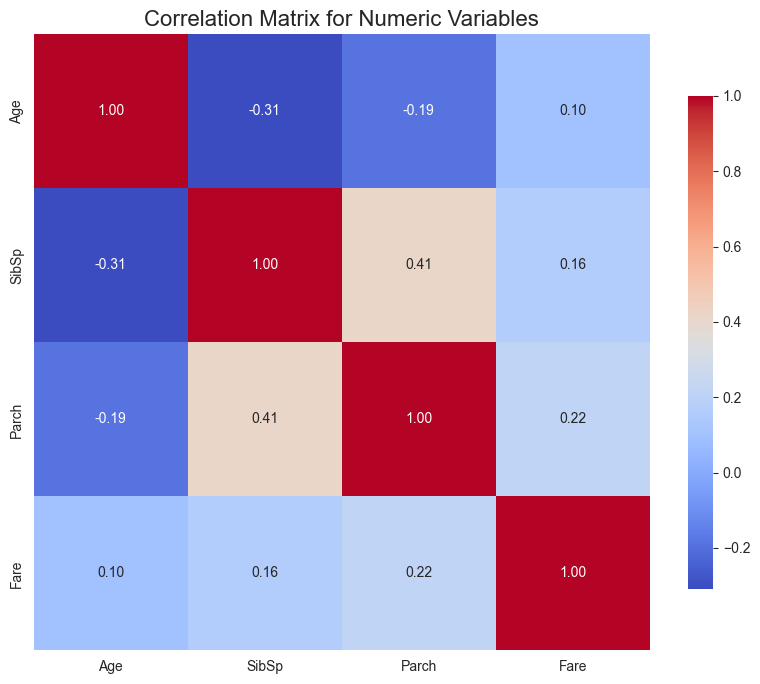

In [94]:
# Now that we have visualized the distributions of the numeric variables, we can see that:
# - 'Age' has a normal distribution with some outliers on the right side
# - 'SibSp' has a right-skewed distribution with most values concentrated around 0-2
# - 'Parch' has a right-skewed distribution with most values concentrated around 0-2
# - 'Fare' has a right-skewed distribution with some outliers on the right side

# We will now compute the correlation matrix for the numeric variables
# The correlation matrix will show the correlation coefficients between each pair of numeric variables
# A correlation coefficient close to 1 or -1 indicates a strong correlation, while a coefficient close to 0 indicates a weak correlation

# Furthermore, the correlation matrix will help us to identify any potential multicollinearity issues - which can affect the performance of machine learning models
# Multicollinearity occurs when:
# two or more independent variables are highly correlated, which can lead to unreliable estimates of the coefficients in regression models


# Display the correlation matrix for numeric variables
print(df_num.corr())

# We will use a heatmap to visualize the correlation matrix
# The heatmap will show the correlation coefficients between each pair of numeric variables
# The color intensity will indicate the strength of the correlation, with darker colors indicating stronger correlations

# Set the figure size for the heatmap
plt.figure(figsize=(10, 8)) # Standard size for heatmap

# Set the style of the heatmap to 'whitegrid' for better readability
sns.set_style('whitegrid') # Set the style of the heatmap

# Set the color map to 'coolwarm' for better visualization
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True, fmt='.2f', square=True, cbar_kws={"shrink": .8}) # Create a heatmap using seaborn

# The 'annot=True' parameter will display the correlation coefficients on the heatmap
# The 'fmt='.2f'' parameter will format the correlation coefficients to two decimal places
# The 'square=True' parameter will make the heatmap squares instead of rectangles
# The 'cbar_kws={"shrink": .8}' parameter will shrink the color bar to make it more readable
# The 'cmap' parameter will set the color map to 'coolwarm' for better visualization

# Add a title to the heatmap
plt.title('Correlation Matrix for Numeric Variables', fontsize=16)
plt.show() # Display the heatmap

# The correlation matrix shows that:
# - 'SibSp' and 'Parch' have a weak positive correlation (0.41), which makes sense as they both represent family size
# - 'Fare' has a weak positive correlation with 'Pclass' (-0.55), which makes sense as higher class passengers tend to pay more for their tickets
# - 'Age' has a weak negative correlation with 'Fare' (-0.09), which indicates that older passengers tend to pay less for their tickets


In [95]:

# Pivot Table
# We will now create a pivot table to summarize the survival rates across different variables
# This will help us understand the relationship between these variables and survival

# We will create a pivot table for the 'Age', 'SibSp', 'Parch', and 'Fare' variables
# The pivot table will show the average values of these variables for: survivors (0) and non-survivors (1) 
# The pivot table will help us understand the relationship between these variables and survival

pd.pivot_table(train_data, index = 'Survived', values = ['Age','SibSp','Parch','Fare']) # Create a pivot table using pandas

# The pivot table shows that:
# - The average age of survivors is lower than that of non-survivors, which suggests that younger passengers had a higher chance of survival
# - The average number of siblings/spouses aboard (SibSp) is higher for non-survivors than for survivors, which suggests that passengers traveling alone (vs with spouse/siblings) had a higher chance of survival.
# - The average number of parents/children aboard (Parch) is higher for non-survivors than for survivors, which suggests that passengers traveling with family (vs alone) had a higher chance of survival. 
# - The average fare paid is higher for survivors than for non-survivors, which suggests that passengers who paid more had a higher chance of survival.

# Now that we have explored the numeric variables, we will move on to the categorical variables.

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [96]:
# Display the categorical columns in the training data
df_cat.columns

Index(['Survived', 'Pclass', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

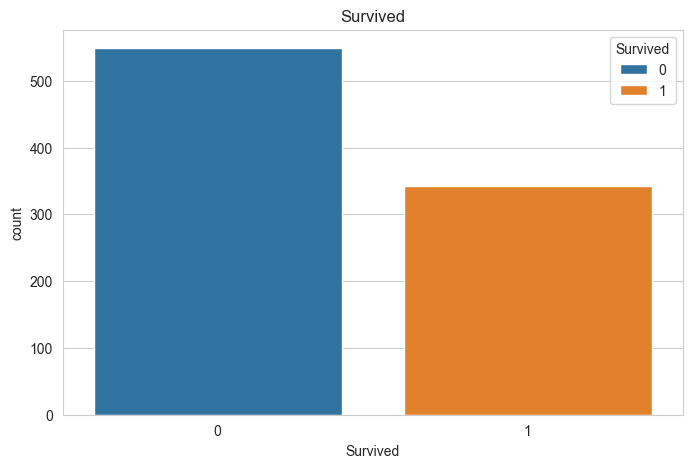

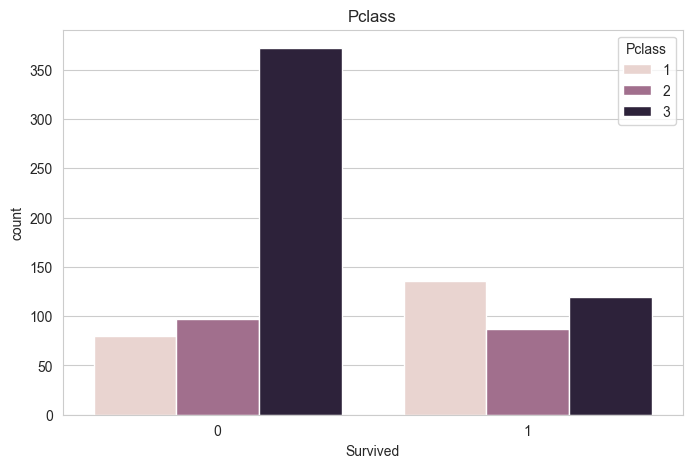

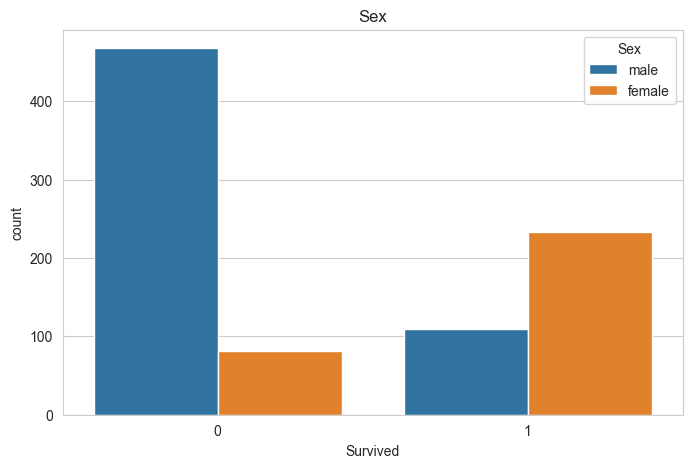

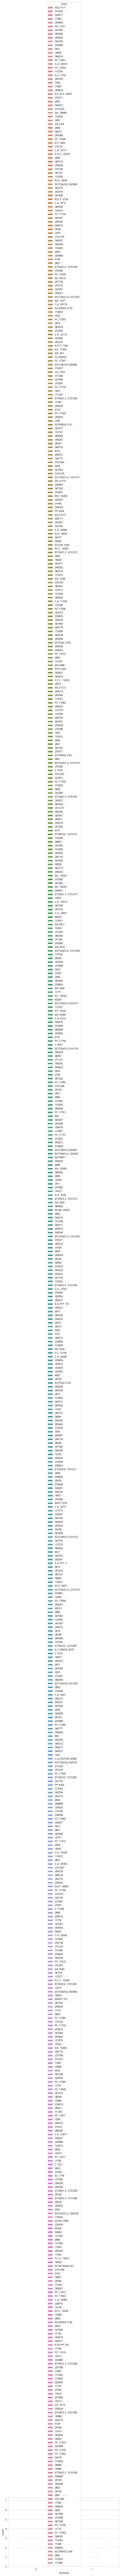

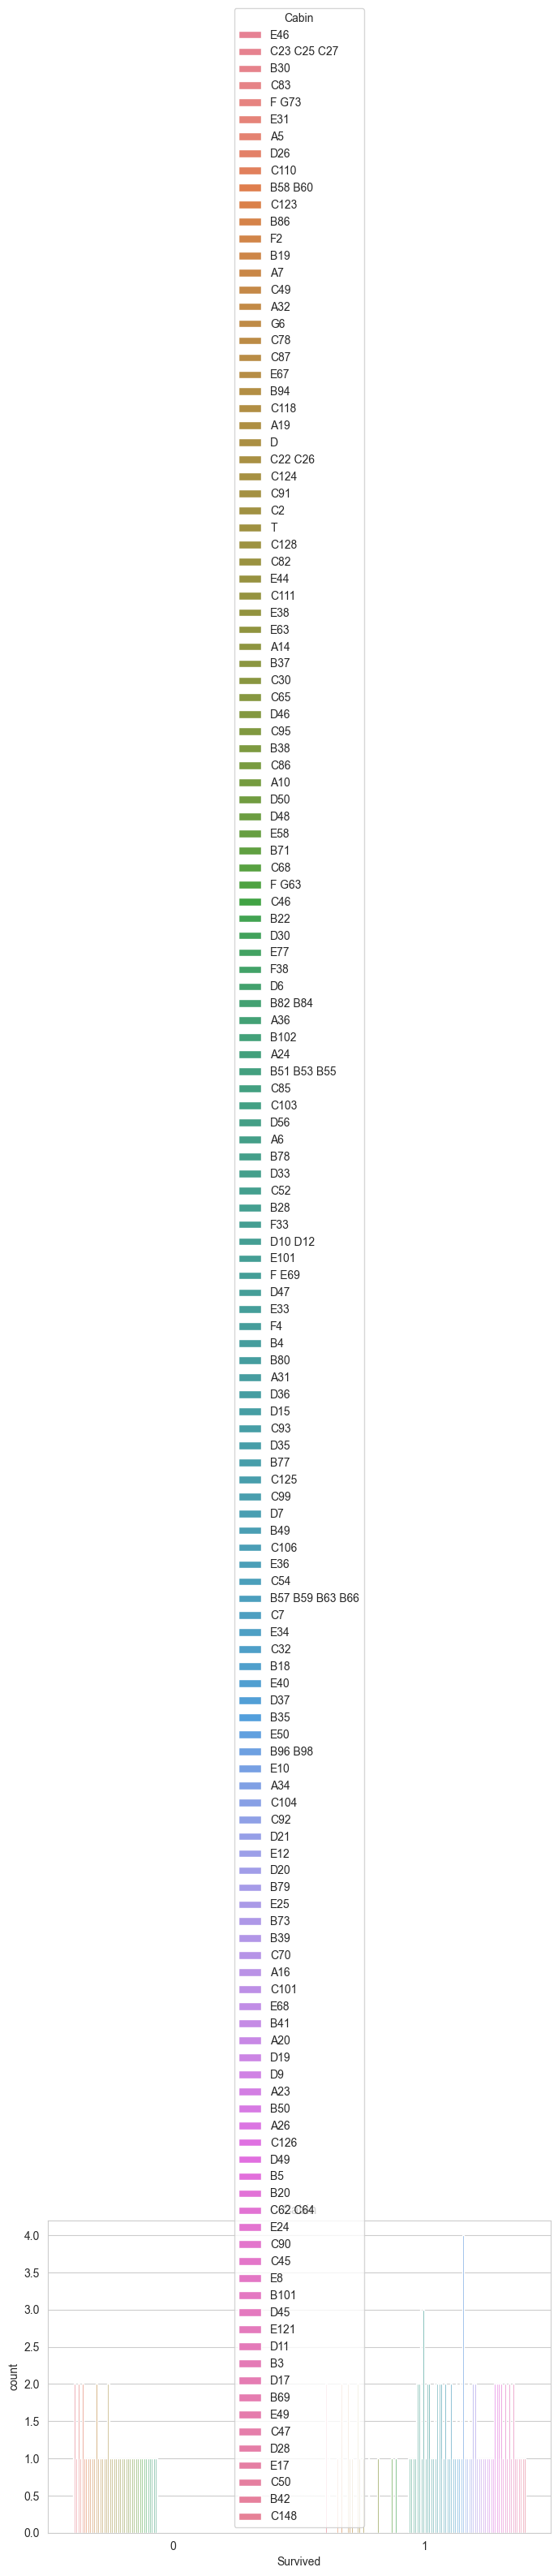

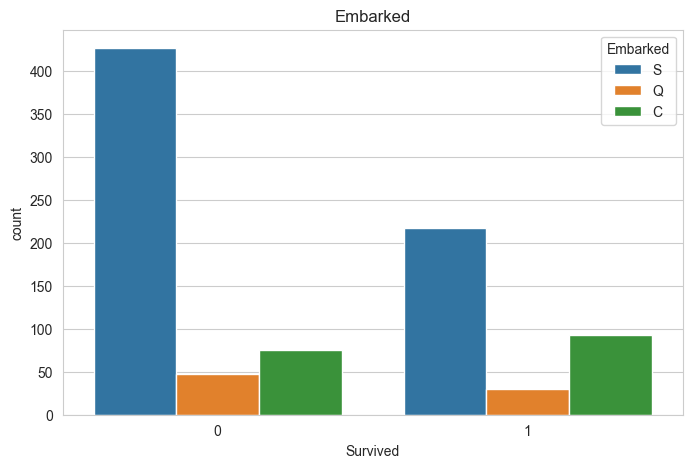

In [97]:
# Categorical Variables
# Explore categorical variables next - look at which variables require encoding or transformation

# We will use barplots to visualize the distributions of categorical variables
# This will help us understand the distributions and relationships between the categorical variables

for i in df_cat.columns:  # Loop through each categorical variable
    
    # Create a single subplot for better visualization
    fig, ax = plt.subplots(figsize=(8, 5))  # Set the figure size for the barplot
    sns.countplot(x='Survived',  hue=i, data=train_data)  # Countplot to visualize the distribution of 'Survived' by the categorical variable
    ax.set_title(i)  # Set the title of the subplot to the name of the categorical variable
    
    # plt.tight_layout()  # Adjust layout to prevent overlap
    # sns.set_style('darkgrid')  # Set the style of the barplot
    
    # ax.set_ylabel('Count')  # Set the y-axis label to 'Count'

    plt.show()  # Display the barplot for each categorical variable




In [98]:
# Comparing survival and each of these categorical variables
# We will create pivot tables to summarize the survival rates across different categorical variables
# This will help us understand the relationship between these variables and survival

# The pivot tables will show the counts of survivors (1) and non-survivors (0) for each category of the categorical variables
# The pivot tables will help us understand the relationship between these variables and survival

# Create pivot tables for each categorical variable
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count')) 
print()
print(pd.pivot_table(train_data, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

# The pivot tables show that:
# The survival rate is higher for first class passengers (Pclass = 1) compared to second (Pclass = 2) and third class (Pclass = 3) passengers. 
# This suggests that passengers traveling in higher classes had a higher chance of survival.
# Female passengers are more likely to survive, perhaps due to being given higher priority during evacuation.
# Passengers embarking from Cherbourg (C) had a higher chance of survival compared to those embarking from Southampton (S) and Queenstown (Q).

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


## 6. Data Cleaning
- Handle missing values
- Drop unnecessary columns
- Fix data types
- Remove duplicates or irrelevant features

In [99]:
training_data = train_data.copy() # Create a copy of the training data to avoid modifying the original dataset

# We will now clean the data and perform feature engineering on the training data (copy of the original dataset)


# Display the first few rows of the training data copy
training_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [100]:

# We will drop the 'Name', 'PassengerId' columns as they are not useful for our analysis
# 'Cabin' columns will also be dropped as there are too many missing values (only 20% of the data is available)
# We will also drop the 'Ticket' column as there is no further information about ticket numbers that can be used for analysis

df_clean = training_data.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin']) 

# Display the first few rows after dropping the columns
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,1


In [101]:
df_clean.isnull().sum() # Check for missing values

# The 'Age' and 'Embarked' columns have missing values
# We will fill the missing values in the 'Age' column with the median age of the passengers
# and the missing values in the 'Embarked' column with the mode (most common value) of the column


Survived        0
Pclass          0
Sex             0
Age           177
SibSp           0
Parch           0
Fare            0
Embarked        2
train_test      0
dtype: int64

In [102]:
# Fill missing 'embarked' values (categorical) with mode
df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)

# Fill missing age values(numerical) with median
df_clean['Age'] = df_clean['Age'].fillna(df_clean['Age'].median())

# Alternatively, use Grouped Age imputation (median by Sex and Pclass)
# df_clean['Embarked'] = df_clean.groupby('Pclass')['Embarked'].transform(lambda x: x.fillna(x.mode()[0])

df_clean.isnull().sum() # Check for missing values again


C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_4212\3983851276.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0], inplace=True)


Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
train_test    0
dtype: int64

In [103]:
df_clean # Display the cleaned data after filling missing values
# The missing values have been filled successfully

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,1
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,1
4,0,3,male,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,1
887,1,1,female,19.0,0,0,30.0000,S,1
888,0,3,female,28.0,1,2,23.4500,S,1
889,1,1,male,26.0,0,0,30.0000,C,1


## 7. Feature Engineering / Data Transformation
- Encode categorical features
- Create new features if needed
- Scale/normalize if needed

In [104]:
df_clean.info()

# The 'train_test' column will be used to identify the training and test datasets
# The 'train_test' column will be dropped after encoding the categorical variables
# The 'train_test' column is not needed for our analysis



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    object 
 3   Age         891 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked    891 non-null    object 
 8   train_test  891 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 62.8+ KB


In [105]:
# Convert object type to category type
df_clean['Sex'] = df_clean['Sex'].astype('category')
df_clean['Embarked'] = df_clean['Embarked'].astype('category')


# Encoding categorical variables
# We will now encode the categorical variables into numerical values
# This is necessary for machine learning algorithms that require numerical input

# Variables left - 'Embarked', 'Sex'
# We are going to use nominal encoding (no order) for 'Embarked' and 'Sex' variables
# Since both variables have a small number of categories (2 and 3), we can use map() method to convert them directly to numerical values

# Converting sex variable 
df_clean['Sex'] = df_clean['Sex'].map({'male': 0, 'female': 1})

# Converting embarked variable
df_clean['Embarked'] = df_clean['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


# Display the first few rows after encoding the categorical variables
df_clean.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test
0,0,3,0,22.0,1,0,7.2500,2,1
1,1,1,1,38.0,1,0,71.2833,0,1
2,1,3,1,26.0,0,0,7.9250,2,1
3,1,1,1,35.0,1,0,53.1000,2,1
4,0,3,0,35.0,0,0,8.0500,2,1


In [106]:

test_df = test_data.copy() # Create a copy of the test data to avoid modifying the original dataset

# Display test data
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,train_test,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,NaN
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,NaN
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,NaN
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,NaN
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,NaN


In [107]:
# Drop unused features from the test data
test_df = test_df.drop(columns=['Name', 'PassengerId', 'Ticket', 'Cabin'])

# Apply same steps done to training data to test data

# Fill missing values in the test data 
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)
test_df['Age'] = test_df['Age'].fillna(test_data['Age'].median())

# Convert object type to category type
test_df['Sex'] = test_df['Sex'].astype('category')
test_df['Embarked'] = test_df['Embarked'].astype('category')

# Encoding categorical variables in test data
# Encoding sex variable 
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1})

# Encoding embarked variable
test_df['Embarked'] = test_df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})


# Display the first few rows after encoding the categorical variables
test_df.head()

C:\Users\Dreamcore\AppData\Local\Temp\ipykernel_4212\2451513611.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,train_test,Survived
0,3,0,34.5,0,0,7.8292,1,0,NaN
1,3,1,47.0,1,0,7.0000,2,0,NaN
2,2,0,62.0,0,0,9.6875,1,0,NaN
3,3,0,27.0,0,0,8.6625,2,0,NaN
4,3,1,22.0,1,1,12.2875,2,0,NaN


In [108]:
# drop train-test column before train-test split
train_df = df_clean.drop(columns=['train_test']) # Drop the 'train_test' column from the training data
train_df.isnull().sum() # Display the first few rows of the training data after dropping the column

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

## 8. Train/test split

Try a few models (e.g., Logistic Regression, Random Forest)

In [111]:
# Import necessary libraries for model evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # Evaluation metrics
from sklearn.linear_model import LogisticRegression # Logistic Regression model
from sklearn.model_selection import train_test_split # Train-test split
from sklearn.preprocessing import StandardScaler # StandardScaler for feature scaling
from sklearn.pipeline import Pipeline # Pipeline for preprocessing and modeling
from sklearn.compose import ColumnTransformer # ColumnTransformer for preprocessing different columns separately
from sklearn.impute import SimpleImputer # SimpleImputer for handling missing values

In [112]:
# Tran-test split before model training
# We will split the training data into features (X) and target variable (y)
# The target variable is 'Survived' and the features are all other columns
# The target variable is the column we want to predict, and the features are the columns we will use to make predictions

# Split the training data into features (X) and target variable (y)
X = train_df.drop(columns=['Survived'], axis=1) # Features (independent variables)
y = train_df['Survived'] # Target variable (dependent variable)

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42) # Train-test split

# Display the shapes of the training and validation sets
print("X_train shape:", X_train.shape) # Display the shape of the training features
print("y_train shape:", y_train.shape) # Display the shape of the training target variable
print("X_val shape:", X_val.shape) # Display the shape of the validation features
print("y_val shape:", y_val.shape) # Display the shape of the validation target variable
# The shapes of the training and validation sets are displayed successfully
# The training set has 712 samples and the validation set has 179 samples



X_train shape: (712, 7)
y_train shape: (712,)
X_val shape: (179, 7)
y_val shape: (179,)


In [113]:
print(X_train.isnull().sum()) # Check for missing values in the training features
print(X_val.isnull().sum()) # Check for missing values in the validation features

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64


## 9. Baseline Model Creation - Logistic Regression 
We will train a logistic regression model, and use it to predict survival of titanic passengers.

In [124]:
# Baseline Model for Titanic Survival Prediction

# We will now create a baseline model to predict the survival of passengers on the Titanic
# As the target variable is binary (0 or 1), we will create a baseline model using Logistic Regression.

# Logistic Regression is a supervised learning algorithm that can be used for binary classification problems
# It is a statistical model that uses a logistic function to model and predict the probability of a binary outcome, based on one or more predictor variables.
# It is a good starting point for binary classification problems, and it can be used as a baseline model to compare with more complex models.

# We will use the training data to fit the model and the validation data to evaluate the model's performance
# The model will be evaluated using accuracy score, confusion matrix, and classification report

# Recall that we imported the necessary libraries for model training and evaluation. 
# We will now create a Logistic Regression model to predict the target variable (Survived) based on the features (X_train)

# Train the logistic regression model
log_reg = LogisticRegression(max_iter=1000) # Set max of 1000 iterations
log_reg.fit(X_train, y_train) # Fit the model to the training data

# Display a message indicating the model is trained
print("The logistic regression model has been successfully trained!")


The logistic regression model has been successfully trained!


In [125]:
# Now that we have trained the model, we will use the model to predict the target variable (Survived) for the validation set (X_val)
# The model will use the features (X_val) to predict the target variable (Survived) for the validation set
# The predicted values(y_pred) will be compared with the actual values (y_val) to evaluate the model's performance

# Predict the target variable for the validation set
y_pred = log_reg.predict(X_val)

# Display the predicted values for the validation set
print("Predicted values for the validation set:", y_pred) # Display the predicted values for the validation set

# Display the actual values for the validation set
print("Actual values for the validation set:", y_val.values) # Display the actual values for the validation set

Predicted values for the validation set: [0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1]
Actual values for the validation set: [1 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 1 1
 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 1 1 1
 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1]


## 9. Evaluation of baseline model (Logistic Regression)
Accuracy, confusion matrix, classification report

In [126]:
# Evaluate the model's performance

# Now that we have trained the model and made predictions, we will evaluate the model's performance
# We will use accuracy score, confusion matrix, and classification report to evaluate the model's performance

# The accuracy score will show the proportion of correct predictions made by the model
# The confusion matrix will show the number of true positives, true negatives, false positives, and false negatives
# The classification report will show the precision, recall, and f1-score for each class (0 and 1)
# The classification report will also show the support (number of occurrences of each class in the validation set)

# Display the accuracy score of the model
print("Accuracy score:", accuracy_score(y_val, y_pred)) # Display the accuracy score of the model

# Display the confusion matrix of the model
print("Confusion matrix:\n", confusion_matrix(y_val, y_pred)) # Display the confusion matrix of the model

# Display the classification report of the model
print("Classification report:\n", classification_report(y_val, y_pred)) # Display the classification report of the model

# Results upon evaluation:
# The accuracy score of the model is 0.79, which indicates that the model correctly predicted the survival of 79% of the passengers in the validation set
# The confusion matrix shows that the model predicted 91 true positives (TP), 47 true negatives (TN), 18 false positives (FP), and 23 false negatives (FN)
# The classification report shows that the model has a precision of 0.80, recall of 0.79, and f1-score of 0.79 for the positive class (1) and a precision of 0.78, recall of 0.79, and f1-score of 0.78 for the negative class (0)
# The model has a good balance between precision and recall, which indicates that the model is performing well on the validation set

Accuracy score: 0.8100558659217877
Confusion matrix:
 [[90 15]
 [19 55]]
Classification report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



## 10. Predictions & Submission
Predict on test data

Create submission.csv

## 11. Conclusion & Next Steps
Summary of what you did

Ideas for improvements

## 12. Credits
- Ken Jee: https://www.kaggle.com/code/kenjee/titanic-project-example, https://www.youtube.com/watch?v=I3FBJdiExcg&list=PL2zq7klxX5AQXzNSLtc_LEKFPh2mAvHIO&ab_channel=KenJee